In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [39]:
# Load California Housing dataset from sklearn
data = fetch_california_housing()

# Use just one feature ('MedInc' - Median Income) for simplicity
X = data.data[0:100, [0]]   # Feature matrix (2D)
y = data.target[0:100]         # Target values (house prices)

# Standardize the input feature for better model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert features and target to TensorFlow tensors (float32 is optimal for TensorFlow)
X_tensor = tf.constant(X_scaled, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

In [44]:
W = tf.Variable(0.0)
b = tf.Variable(0.0)
learning_rate = 0.01
epochs = 10

# Training loop using gradient descent
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Linear regression prediction: y = W * X + b
        y_pred = W * tf.squeeze(X_tensor) + b

        # loss and cost Fn using Mean squared error
        # loss = tf.square(y_pred - y_tensor)
        cost = tf.reduce_mean(tf.square(y_pred - y_tensor))

    # Calculate gradients w.r.t W and b
    dW, db = tape.gradient(cost, [W, b])

    # Update weights and bias using gradients
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)

    # Log progress every 20 epochs
    # if epoch % 20 == 0:
    print(f"Epoch {epoch}, Loss: {cost.numpy():.4f}, W: {W.numpy():.4f}, b: {b.numpy():.4f}")

Epoch 0, Loss: 2.9323, W: 0.0098, b: 0.0304
Epoch 1, Loss: 2.8317, W: 0.0193, b: 0.0601
Epoch 2, Loss: 2.7350, W: 0.0287, b: 0.0892
Epoch 3, Loss: 2.6422, W: 0.0379, b: 0.1178
Epoch 4, Loss: 2.5530, W: 0.0469, b: 0.1458
Epoch 5, Loss: 2.4674, W: 0.0558, b: 0.1732
Epoch 6, Loss: 2.3852, W: 0.0644, b: 0.2001
Epoch 7, Loss: 2.3062, W: 0.0729, b: 0.2265
Epoch 8, Loss: 2.2304, W: 0.0812, b: 0.2523
Epoch 9, Loss: 2.1575, W: 0.0893, b: 0.2776


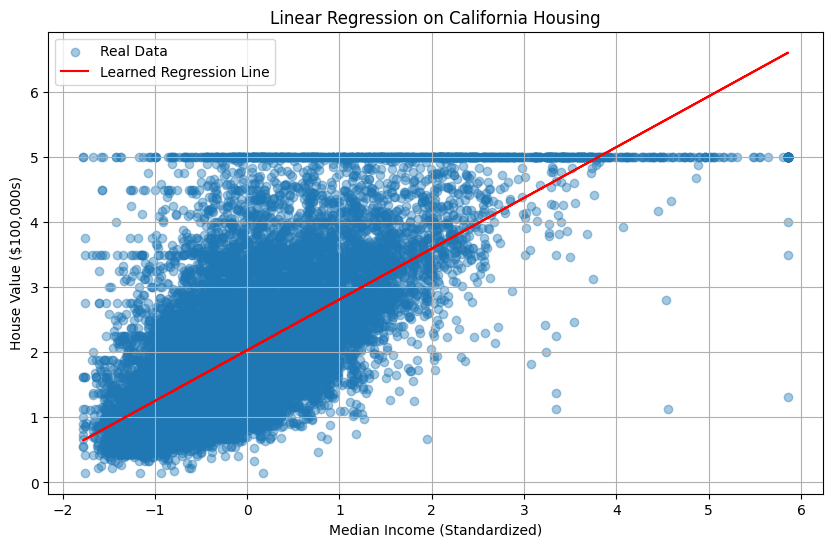

In [10]:
# Plotting the input data and the learned regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y, label="Real Data", alpha=0.4)
plt.plot(X_scaled, W.numpy() * X_scaled + b.numpy(), color='red', label="Learned Regression Line")
plt.title("Linear Regression on California Housing")
plt.xlabel("Median Income (Standardized)")
plt.ylabel("House Value ($100,000s)")
plt.legend()
plt.grid(True)
plt.show()
